# Activity Recognition from Single Chest-Mounted Accelerometer

The Activity Recognition from Single Chest-Mounted Accelerometer dataset mainly comprises of uncalibrated accelerometer data mounted on 15 respondents(users). The experiment basically analyses 7 activities performed by each respondent. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer. The activities in the dataset are codified by numbers and following are the information of the numbers assigned to each of the activity:

1. Working at computer is codified as 1
2. Standing up, Walking and going updown stairs is codified as 2
3. Standing is codified as 3
4. Walking is codified as 4
5. Going upDown stairs is codified as 5
6. Walking and talking with someone is codified as 6
7. Talking While Standing is codified as 7

# Data Preparation

##### In order to perform data preparation we will first read all the 15 files at once. Moreover, while appending each file we will add one columne, representing the respondent no (to which respondent/user this file belongs). Also, this dataset do not have any missing values.

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
fpath=r'Activity Recognition from Single Chest-Mounted Accelerometer'
fdirs=glob(fpath+"/*.csv")
final_df=pd.DataFrame()


In [2]:
#To read all files at a once
PID=0
final_acc=pd.DataFrame([])
for PID,filename in enumerate(fdirs):
    acc=pd.read_csv(filename,index_col=None,header=None)
    acc['User ID']=PID+1
    final_acc=final_acc.append(acc)

In [3]:
final_acc.head(20)
#as the 1st column is same as index so we can drop it
final_acc.columns=['X','X-acceleration','Y-acceleration','Z-acceleration','Activity ID','User ID']

In [4]:
final_acc.drop(['X'],axis=1,inplace=True)

In [5]:
#Basic Information regarding the data
print('Information regarding the dataset')
final_acc.info()
print('The description regarding the dataset')
final_acc.iloc[:,0:3].describe()

Information regarding the dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926896 entries, 0 to 166740
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   X-acceleration  int64
 1   Y-acceleration  int64
 2   Z-acceleration  int64
 3   Activity ID     int64
 4   User ID         int64
dtypes: int64(5)
memory usage: 88.2 MB
The description regarding the dataset


,X-acceleration,Y-acceleration,Z-acceleration
count,1.926896e+06,1.926896e+06,1.926896e+06
mean,1.987652e+03,2.382523e+03,1.970596e+03
std,1.113578e+02,1.003151e+02,9.445893e+01
min,2.820000e+02,2.000000e+00,1.000000e+00
25%,1.904000e+03,2.337000e+03,1.918000e+03
50%,1.992000e+03,2.367000e+03,1.988000e+03
75%,2.076000e+03,2.413000e+03,2.032000e+03
max,3.828000e+03,4.095000e+03,4.095000e+03


# Data Exploration


#### The data exploration will help us in understanding the dataset. We have performed 10 explorations for different columns and each exploration tells us a new thing about the data. 


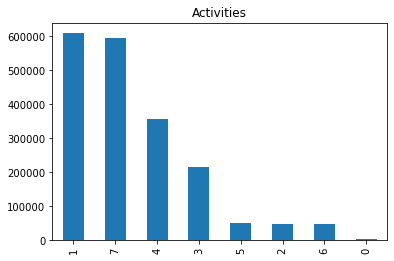

In [6]:
person = final_acc.iloc[:, -2].value_counts()
person.plot(kind = 'bar', title = "Activities");

#### From the above bar graph it is evedent that Activity numbers 1, 7 and 4 i.e. working at computers, Talking while standing and walking are the most frequently done activities. Moreover, Activity 1 (Working at computers) is the most done activity which indicates that all the respondents have a job which requires to work on computers. Furthermore, other frequently done activities like 7 and 4 indicate that our respondents care about their fitness.

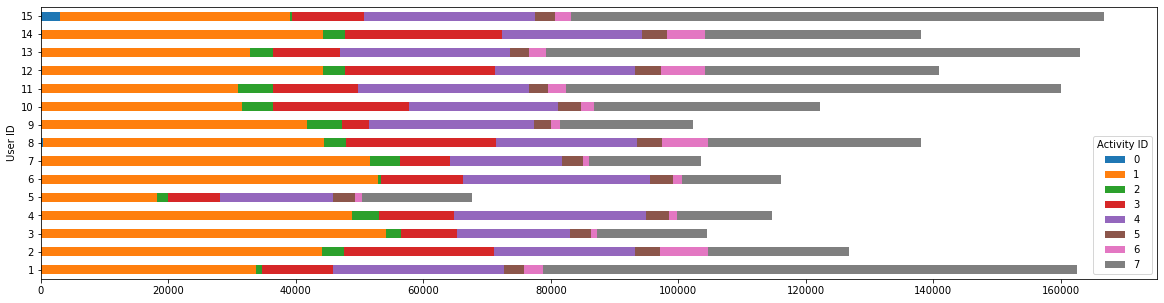

In [7]:
test = pd.crosstab(index=final_acc.iloc[:, -1], columns=final_acc.iloc[:, -2])
test.plot(kind = "barh", stacked = True, figsize = (20, 5))
plt.show()

#### From the above bar chart we can clearly make out the amount of work each respondent does. From the chart, respondent 3 does most ofthe work on computers; whereas respondent number 5 does the least. Also respondent number 2, 8, 12 and 14 perform activity number 6. Therefore, we can assume these respondents as fitness freaks. Furthermore, respondent number 5 spends a very less time in all the activities, hence we can assume that respondent number 5 is not that active as compared to the other respondents or may be the respondent is aged (old) when comparerd to other respondents.

#### The Following explorations give information about the x, y and z accelerations trends with respect to the activities. For all the 7 activities we have plotted a subplot; giving information about the accelerations per activity.

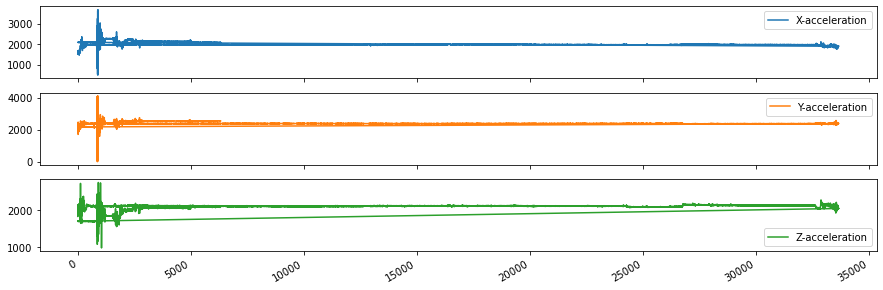

In [8]:
# Working at Computers 
expOne = final_acc[final_acc['Activity ID'] == 1]
expOne = expOne[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expOne = expOne[:40000]
axOne = expOne.plot(subplots = True, figsize = (15, 5))

#### From the above exploration, we can clearly see some large movements at the beginning. This unusal behaviour may be because of the presence of the outliers, The reason for such unusual behaviour could be the instability of the accelerometer which placing it or switching on. Also working with computers requires no sort of major movemet, which can be clearly seen ahead in the plot.

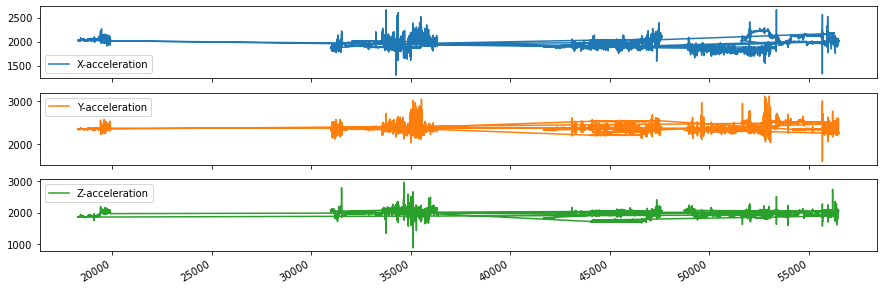

In [9]:
# Standing Up, Walking and going up down stairs 
expTwo = final_acc[final_acc['Activity ID'] == 2]
expTwo = expTwo[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expTwo = expTwo[:40000]
axTwo = expTwo.plot(subplots = True, figsize = (15, 5))

#### From the above exploration we can see no movement in the begning which clearly indicates that the respondents are standing up at that particular moment. Furthermore spikes at some point in the plot indicate some kind of movement i.e. at that moment it is possible that the respondent is doing some tasks which require some kind of a movement (walking, going up or down the stairs).

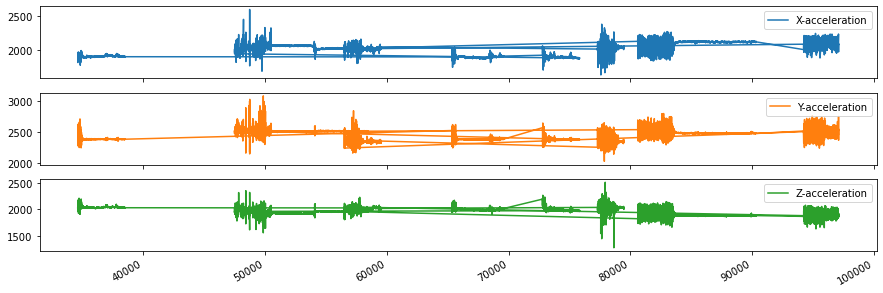

In [10]:
#Standing
expThree = final_acc[final_acc['Activity ID'] == 3]
expThree = expThree[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expThree = expThree[:40000]
axThree = expThree.plot(subplots = True, figsize=(15, 5))

#### From the above graph we can clearly see some movement, these movements are considerable because a person can not stand still all the time. Moreover, in the begning, we can spot some unusual behaviour. These unusual patterns can be caused because of the presence of the outliers in the dataset. These outliers can be removed to make the dataset look more uniform and normal.

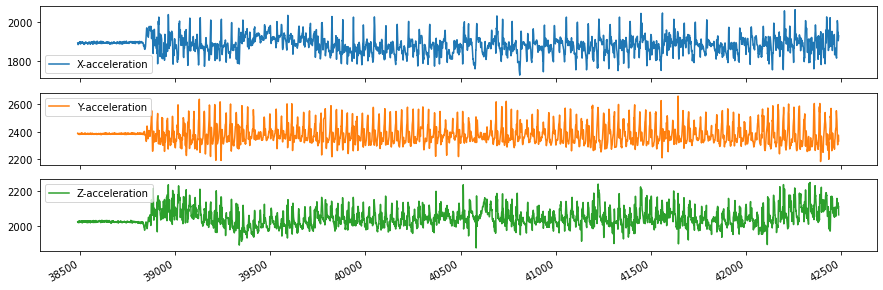

In [11]:
# Walking
expFour = final_acc[final_acc['Activity ID'] == 4]
expFour = expFour[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFour = expFour[:4000]
axFour  = expFour.plot(subplots = True, figsize=(15, 5))

#### From the above plot we can see a constant movement in the plot, which is normal because walking requires constant movement of the body. Also, further the speed of the respondent can be observed i.e. when the respondent walks fast the x, y and z coordinates will show some rapid changes. Hence, other than activity speed of the respondent can also be determined using this data.

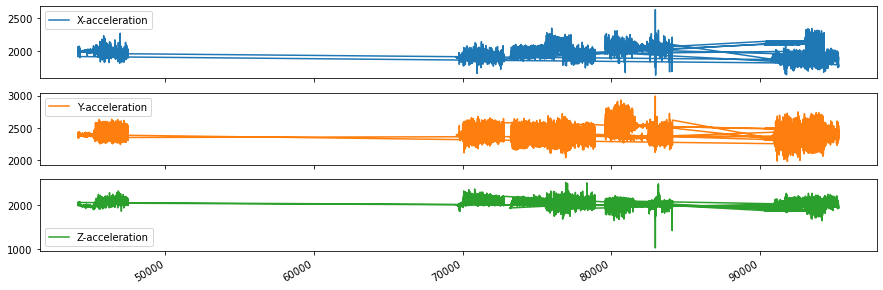

In [12]:
# Going UP Down Stairs
expFive = final_acc[final_acc['Activity ID'] == 5]
expFive = expFive[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFive = expFive[:40000]
axFive  = expFive.plot(subplots = True, figsize=(15, 5))

#### From the above plot we can clearly figure out some kind of a movement or work done i.e. Going up Down Stairs. Somewhere in the middle we can observe a constant movement, this constant movement may be caused while going down the stairs as going down the stairs do not require much of work; whereas some rapid fluctuation can also be seen, these rapid fluctuation can be caused while going up the stairs as going up requires more.

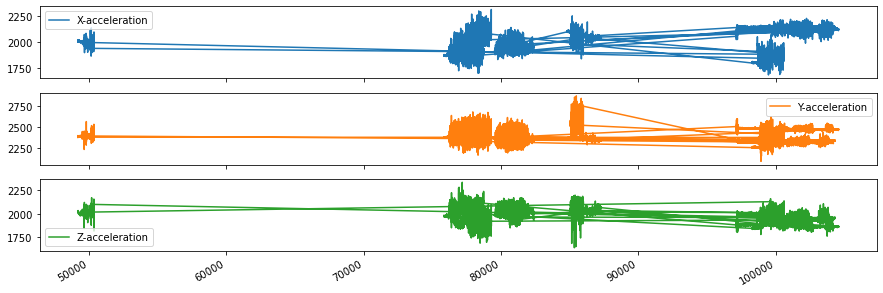

In [13]:
# Walking and talking with someone
expSix = final_acc[final_acc['Activity ID'] == 6]
expSix = expSix[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSix = expSix[:40000]
axSix  = expSix.plot(subplots = True, figsize=(15, 5))

#### from the above plot we can clearly see some smooth linear line and some spikes. These smooth linear lines indicate that respondent is talking or is a conversation with some one; and the spikes indicates some sort of a movement i.e. walking or talking on phone while walking. Also, in the middle the speed of the respondents can also be observed i.e. an instant fluctuation in the graph indicates that the respondents have increased their speed while walking. The contribution to the fluctuation is not solely because of the speed; talking can also contribute as our body vibrates while talking. Therefore, assuming that walking only causes the fluctuation will be a wrong assumption.

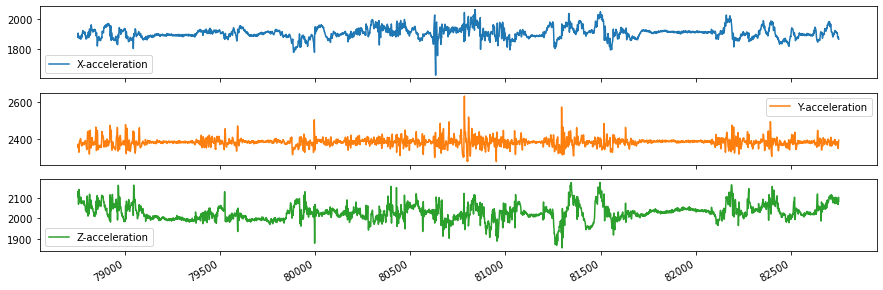

In [14]:
#Talking while standing
expSeven = final_acc[final_acc['Activity ID'] == 7]
expSeven = expSeven[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSeven = expSeven[:4000]
axSeven  = expSeven.plot(subplots = True, figsize = (15, 5))

#### from the above graph we can see some movement which is very obvious because standing still is not possible all the time. Also, while talking our body produces some vibrations, these vibrations can also have a contribution in the movement of the accelerometer.

# Data Modelling

#### Splitting the data into train and test set¶
To split the dataset into training and test set we need to select the features based on which our model is going to predict the labeled values(target variables). These features are also called independent varaibles and the target variables are termed as dependent variabels. Mostly, we keep 70% of the data in the training phase and rest 30% in the test phase. The more the model gets the data to train, the better prediction will be done.

In [57]:
from sklearn.model_selection import train_test_split
x = final_acc.iloc[:, 0:3]
y = final_acc.iloc[:, -2]


In [58]:
#Splitting the data into train and test, keeping 70% in train and rest 30% in test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 

In [59]:
print('x_train shape :',x_train.shape)
print('x_test shape :',x_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

x_train shape : (1348827, 3)
x_test shape : (578069, 3)
y_train shape : (1348827,)
y_test shape : (578069,)


# Modelling



#### Decision Tree Classifier
A decision tree is a representation used for classification, where the dataset is split based on different conditions. For this dataset, we choose to use this type of classification, where we split the data based on some parameter. Also, we intend tune the parameters so that we can use those parameter and get a good accuracy score for the choosen dataset. Furthermore, Kfold cross validation and stratified shuffel split cross validation are used

In [18]:
'''We can also do this by using a gridsearch cv but this technique takes a lot of time to execute. Although, it has been done for the reference. it took 3 hours to execute. The code has been commented out if you want to run the code and see the results then just uncomment it.'''

'We can also do this by using a gridsearch cv but this technique takes a lot of time to execute. Although, it has been done for the reference. it took 3 hours to execute. The code has been commented out if you want to run the code and see the results then just uncomment it.'

In [39]:
from sklearn.model_selection import GridSearchCV as gs
import numpy as np
conditions = {'criterion' : ('gini', 'entropy'), 'max_depth' : np.arange(1, 25, 2)}
decision_t = gs(decision_model, conditions, cv= 25)
decision_t.fit(x_train, y_train)
decision_t.best_params_ 
print(dt.score(x_test, y_test))

"from sklearn.model_selection import GridSearchCV as gs\nimport numpy as np\nconditions = {'criterion' : ('gini', 'entropy'), 'max_depth' : np.arange(1, 25, 2)}\ndecision_t = gs(decision_model, conditions, cv= 25)\ndecision_t.fit(x_train, y_train)\ndecision_t.best_params_ \nprint(dt.score(x_test, y_test))"

##### Decision Tree Classifier using the best parameters (Calculated Above)

In [20]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import classification_report as cr
from sklearn import metrics  
from sklearn.metrics import confusion_matrix

decision_tree = dtc(criterion = 'gini', max_depth = 15) 
decision_tree.fit(x_train, y_train) #fitting the x train and y train set into the decision tree model 
y_predicted = decision_tree.predict(x_test)

In [40]:
print('Accuracy Score for Normal Decision Tree Classifier: ', (metrics.accuracy_score(y_test, y_predicted)*100))

Accuracy Score for Normal Decision Tree Classifier:  73.92698795472513


In [41]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

Confusion Matrix:
[[     7    576      7     59    203      4      0    229]
 [    12 165194   1062   1989   5631    159     87   8229]
 [     0   5864   2011    745   3020     65     30   2690]
 [     9   3786    206  29939  14159    723    637  15339]
 [    16   8298    521   6239  76824    587    391  13972]
 [     3   1513     35   3397   6198   1429    287   2641]
 [     1    702     37   1704   2759    383   2775   6034]
 [    11   7658    269   7080  12699    253   1512 149170]] 



In [43]:
#classification Report
print(cr(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.12      0.01      0.01      1085
           1       0.85      0.91      0.88    182363
           2       0.48      0.14      0.22     14425
           3       0.59      0.46      0.52     64798
           4       0.63      0.72      0.67    106848
           5       0.40      0.09      0.15     15503
           6       0.49      0.19      0.28     14395
           7       0.75      0.83      0.79    178652

    accuracy                           0.74    578069
   macro avg       0.54      0.42      0.44    578069
weighted avg       0.72      0.74      0.72    578069



# Decision Tree With Kfold Cross Validation:
Kfold cross validation, the data is divided into folds. Each fold is has specific amount of data to train and test. once the training and testing are performed, we then simultaniously check the accuracy score for each validation dataset.

In [22]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import cross_val_predict as cvp

decision_model = dtc() 
k_fold = kf(n_splits = 25, random_state = 0)
#Decision Tree Model is trained on the entire dataset
accuracyScores = cvs(decision_model, x, y, cv = k_fold) 
#Predicting the target values using the modified decision tree model on the unseen data
pred = cvp(decision_model, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [44]:
print('Accuracy Score for  Decision Tree Classifier with cross validation is: ', (metrics.accuracy_score(y_test,pred)*100))

Accuracy Score for  Decision Tree Classifier with cross validation is:  72.22009829276436


In [46]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred)
print("Confusion Matrix:")
print(cm, "\n")

Confusion Matrix:
[[    94    524      4     75    182      7     23    176]
 [   198 165134   1878   2428   5326    251    130   7018]
 [    12   5543   3005   1014   2837     83     47   1884]
 [    37   4196    605  31388  13546   1644    874  12508]
 [    81   8764   1170  10675  72876   1009    574  11699]
 [    11   1559    105   3505   5742   2005    290   2286]
 [    14    751    116   2172   2764    537   3087   4954]
 [    66   9044   1003  11278  13825    901   2642 139893]] 



In [47]:
#classification Report
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.18      0.09      0.12      1085
           1       0.84      0.91      0.87    182363
           2       0.38      0.21      0.27     14425
           3       0.50      0.48      0.49     64798
           4       0.62      0.68      0.65    106848
           5       0.31      0.13      0.18     15503
           6       0.40      0.21      0.28     14395
           7       0.78      0.78      0.78    178652

    accuracy                           0.72    578069
   macro avg       0.50      0.44      0.46    578069
weighted avg       0.71      0.72      0.71    578069



##### The reason for such low accuracy result is the uneven distribution of the target variables(Activities). In the dataset the activity numbers 7 and 1 are the most frequently done activities but in the dataset there are many activities which are not done very often. Therefore, in some folds it is possible that such activities donot exist, hence affecting our accuracy result. However, in the normal decision tree we have the same number of target distribution but the number of instances(data) are more which is an obvious reason for the good cross validation score.

# KNN (KNearst Neighbor) Classifier:¶
KNN(KNearst Neighbor) is a non-parametric method used for classification. Such type of classification method are based on feature similarity. With this dataset, we intend to run a normal KNN and check the accuracy for it. Furthermore, we will also do a KFold cross validation.

In [48]:
# Importing KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier as knc 

knnModel = knc(25)
#Fitting the training and test set 
knnModel_1 = knnModel.fit(x_train, y_train) 
y_pred = knnModel_1.predict(x_test)

In [50]:
print('Accuracy Score for Normal KNN: ', (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy Score for Normal KNN:  75.0763317181859


In [51]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, "\n")

Confusion Matrix:
[[    35    560      2     60    195      0     10    223]
 [    22 166393    978   1721   5498    121     60   7570]
 [    12   5576   2601    749   3167     45     15   2260]
 [     1   3302    230  30624  14567   1043    618  14413]
 [    15   7419    313   5656  79736    272    327  13110]
 [     0   1295     23   3017   6534   1756    225   2653]
 [     0    669     34   1668   2881    482   2967   5694]
 [     2   7053    347   6819  12751    313   1486 149881]] 



In [52]:
#classification Report
print(cr(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.03      0.06      1085
           1       0.87      0.91      0.89    182363
           2       0.57      0.18      0.27     14425
           3       0.61      0.47      0.53     64798
           4       0.64      0.75      0.69    106848
           5       0.44      0.11      0.18     15503
           6       0.52      0.21      0.30     14395
           7       0.77      0.84      0.80    178652

    accuracy                           0.75    578069
   macro avg       0.60      0.44      0.46    578069
weighted avg       0.74      0.75      0.73    578069



##### KNN with KFold Cross Validation

In [53]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neighbors import KNeighborsClassifier as knc 
from sklearn.model_selection import cross_val_predict as cvp

Knn = knc() 
k_fold = kf(n_splits = 25, random_state = 0)
#KNN is trained on the entire dataset
accuracyScores = cvs(Knn, x, y, cv = k_fold) 
#Predicting the target values using the modified KNN model on the unseen data
pred = cvp(Knn, x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [54]:
print('Accuracy Score for kfold validation KNN: ', (metrics.accuracy_score(y_test,pred)*100))

Accuracy Score for kfold validation KNN:  72.22009829276436


In [55]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred)
print("Confusion Matrix:")
print(cm, "\n")

Confusion Matrix:
[[    94    524      4     75    182      7     23    176]
 [   198 165134   1878   2428   5326    251    130   7018]
 [    12   5543   3005   1014   2837     83     47   1884]
 [    37   4196    605  31388  13546   1644    874  12508]
 [    81   8764   1170  10675  72876   1009    574  11699]
 [    11   1559    105   3505   5742   2005    290   2286]
 [    14    751    116   2172   2764    537   3087   4954]
 [    66   9044   1003  11278  13825    901   2642 139893]] 



In [56]:
#classification Report
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.18      0.09      0.12      1085
           1       0.84      0.91      0.87    182363
           2       0.38      0.21      0.27     14425
           3       0.50      0.48      0.49     64798
           4       0.62      0.68      0.65    106848
           5       0.31      0.13      0.18     15503
           6       0.40      0.21      0.28     14395
           7       0.78      0.78      0.78    178652

    accuracy                           0.72    578069
   macro avg       0.50      0.44      0.46    578069
weighted avg       0.71      0.72      0.71    578069



# Conclusion:
From the above analysis, it is concluded that KNN (accuracy score)i.e. 75%; whereas the decision tree(accuracy score) is somewhere around 72%.
Therefore, for the "Activity Recognition from Single Chest-Mounted Accelerometer" dataset KNN classification model can be consdered to recognise the given activity. 